In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Data Exploration

In [2]:
police_killings = pd.read_csv('police_killings.csv', encoding='ISO-8859-1')

In [3]:
police_killings.dtypes

name                     object
age                      object
gender                   object
raceethnicity            object
month                    object
day                       int64
year                      int64
streetaddress            object
city                     object
state                    object
latitude                float64
longitude               float64
state_fp                  int64
county_fp                 int64
tract_ce                  int64
geo_id                    int64
county_id                 int64
namelsad                 object
lawenforcementagency     object
cause                    object
armed                    object
pop                       int64
share_white              object
share_black              object
share_hispanic           object
p_income                 object
h_income                float64
county_income             int64
comp_income             float64
county_bucket           float64
nat_bucket              float64
pov     

In [4]:
police_killings.head()

,name,age,gender,raceethnicity,month,day,year,streetaddress,city,state,...,share_hispanic,p_income,h_income,county_income,comp_income,county_bucket,nat_bucket,pov,urate,college
0,A'donte Washington,16,Male,Black,February,23,2015,Clearview Ln,Millbrook,AL,...,5.6,28375,51367.0,54766,0.937936,3.0,3.0,14.1,0.097686,0.168510
1,Aaron Rutledge,27,Male,White,April,2,2015,300 block Iris Park Dr,Pineville,LA,...,0.5,14678,27972.0,40930,0.683411,2.0,1.0,28.8,0.065724,0.111402
2,Aaron Siler,26,Male,White,March,14,2015,22nd Ave and 56th St,Kenosha,WI,...,16.8,25286,45365.0,54930,0.825869,2.0,3.0,14.6,0.166293,0.147312
3,Aaron Valdez,25,Male,Hispanic/Latino,March,11,2015,3000 Seminole Ave,South Gate,CA,...,98.8,17194,48295.0,55909,0.863814,3.0,3.0,11.7,0.124827,0.050133
4,Adam Jovicic,29,Male,White,March,19,2015,364 Hiwood Ave,Munroe Falls,OH,...,1.7,33954,68785.0,49669,1.384868,5.0,4.0,1.9,0.063550,0.403954


## Does race matter?

In [5]:
race_counts = police_killings['raceethnicity'].value_counts()

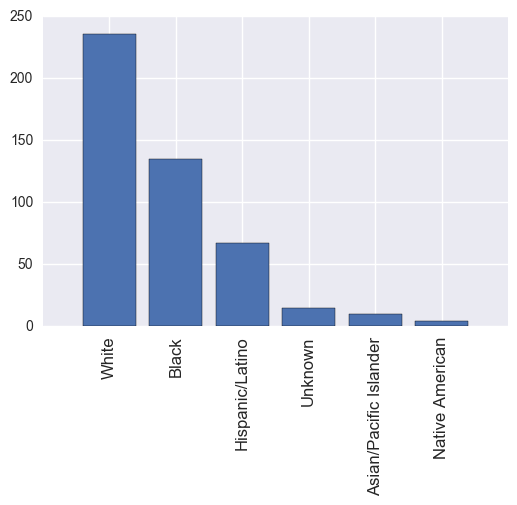

In [6]:
plt.bar(np.arange(race_counts.size), race_counts, align='center')
plt.xticks(np.arange(race_counts.size), race_counts.index, rotation='vertical', fontsize='large')
plt.show()

In [7]:
race_counts / np.sum(race_counts) * 100

White                     50.535332
Black                     28.907923
Hispanic/Latino           14.346895
Unknown                    3.211991
Asian/Pacific Islander     2.141328
Native American            0.856531
Name: raceethnicity, dtype: float64

from the charts above, we found that about half of people been killed are white. Black people account for approximately one thirds.

## Does regional income matter?

In [8]:
income = police_killings[police_killings['p_income'] != '-']['p_income']

In [9]:
income = income.astype('float')

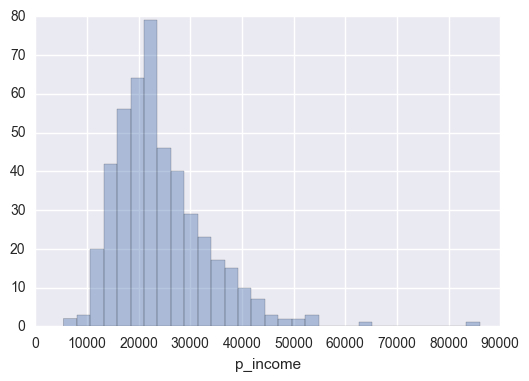

In [10]:
sns.distplot(income, kde=False)
sns.plt.show()

In [11]:
income.median()

22348.0

The figure above shows that the high police killing rate happen in the states that the median income are about 22,000 dollar.

## Shootings By State

In order to analyze the killing data by state, we need to know not only the number of people have been killed in each state, but also the population in each state. 

In [12]:
state_pop = pd.read_csv('state_population.csv')

In [13]:
state_pop.head()

,SUMLEV,REGION,DIVISION,STATE,NAME,POPESTIMATE2015,POPEST18PLUS2015,PCNT_POPEST18PLUS
0,10,0,0,0,United States,321418820,247773709,77.1
1,40,3,6,1,Alabama,4858979,3755483,77.3
2,40,4,9,2,Alaska,738432,552166,74.8
3,40,4,8,4,Arizona,6828065,5205215,76.2
4,40,3,7,5,Arkansas,2978204,2272904,76.3


In [14]:
state_counts = police_killings['state_fp'].value_counts()

Creating a new Data Frame and combine with the state population, so that we can find out the killing rate.

In [15]:
states = pd.DataFrame({'STATE': state_counts.index, 'shooting': state_counts})

In [16]:
states = states.merge(state_pop, on='STATE')

In [17]:
states.head()

,STATE,shooting,SUMLEV,REGION,DIVISION,NAME,POPESTIMATE2015,POPEST18PLUS2015,PCNT_POPEST18PLUS
0,6,74,40,4,9,California,39144818,30023902,76.7
1,48,47,40,3,7,Texas,27469114,20257343,73.7
2,12,29,40,3,5,Florida,20271272,16166143,79.7
3,4,25,40,4,8,Arizona,6828065,5205215,76.2
4,40,22,40,3,7,Oklahoma,3911338,2950017,75.4


Convert the unit of population to millions.

In [18]:
states['pop_millions'] = states['POPESTIMATE2015'] / 1000000

In [19]:
states['rate'] = states['shooting'] / states['pop_millions']

Ordering `rate` column from highest to lowest.

In [20]:
states[['STATE', 'shooting', 'NAME', 'pop_millions', 'rate']].sort_values('rate', ascending=False)

,STATE,shooting,NAME,pop_millions,rate
4,40,22,Oklahoma,3.911338,5.624674
3,4,25,Arizona,6.828065,3.661359
27,31,6,Nebraska,1.896190,3.164240
34,15,4,Hawaii,1.431603,2.794071
39,2,2,Alaska,0.738432,2.708442
33,16,4,Idaho,1.654930,2.417021
32,35,5,New Mexico,2.085109,2.397956
10,22,11,Louisiana,4.670724,2.355095
7,8,12,Colorado,5.456574,2.199182
41,10,2,Delaware,0.945934,2.114312


From the chart above, we can wrap up. Generally speaking, states located in middle south have the heighest rate of police killing rate. However, the rate in northeast seem to be the lowest.

## State By State Differences

Which states have the highest number of police killing?

In [21]:
states[['STATE', 'shooting', 'NAME', 'pop_millions', 'rate']].sort_values('shooting', ascending=False)

,STATE,shooting,NAME,pop_millions,rate
0,6,74,California,39.144818,1.890416
1,48,47,Texas,27.469114,1.711013
2,12,29,Florida,20.271272,1.430596
3,4,25,Arizona,6.828065,3.661359
4,40,22,Oklahoma,3.911338,5.624674
5,13,16,Georgia,10.214860,1.566346
6,36,13,New York,19.795791,0.656705
7,8,12,Colorado,5.456574,2.199182
10,22,11,Louisiana,4.670724,2.355095
11,17,11,Illinois,12.859995,0.855366


In [22]:
pk = police_killings[(police_killings['share_white'] != '-') & \
                     (police_killings['share_black'] != '-') & \
                     (police_killings['share_hispanic'] != '-')]

In [23]:
pk['share_white'] = pk['share_white'].astype('float64')
pk['share_black'] = pk['share_black'].astype('float64')
pk['share_hispanic'] = pk['share_hispanic'].astype('float64')

/Users/yuzezou/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/yuzezou/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Users/yuzezou/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

We have to change state's name to its abbreviate name because there is no abbr name for state. 

In [24]:
lowest_states_list = ["CT", "PA", "IA", "NY", "MA", "NH", "ME", "IL", "OH", "WI"]
highest_states_list = ["OK", "AZ", "NE", "HI", "AK", "ID", "NM", "LA", "CO", "DE"]

lowest_states = pk[pk['state'].isin(lowest_states_list)]
highest_states = pk[pk['state'].isin(highest_states_list)]

Comparing these columns by means of median.

In [25]:
columns = ["pop", "county_income", "share_white", "share_black", "share_hispanic"]

In [26]:
lowest_states[columns].median()

pop                4121.50
county_income     52930.00
share_white          72.95
share_black           9.15
share_hispanic        6.20
dtype: float64

In [27]:
highest_states[columns].median()

pop                4257.50
county_income     48801.00
share_white          58.20
share_black           2.70
share_hispanic       10.85
dtype: float64

In the states of the lower country income, the police killing rate are higher. By contrary, in the states of higher country income, the police killing rate is lower. 

## Let's find out the cause.

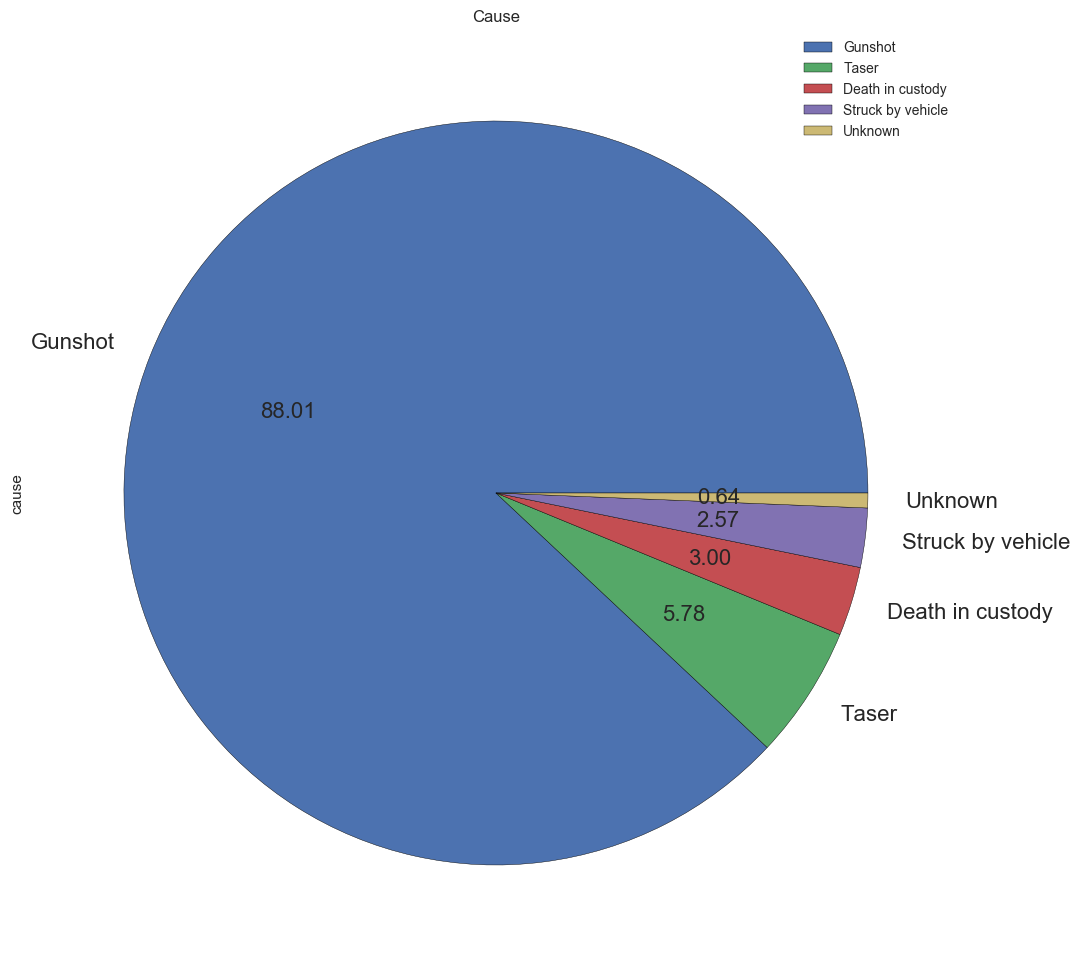

In [28]:
causes = police_killings['cause'].value_counts()
causes.plot(kind='pie', autopct='%.2f', title='Cause', fontsize=16, figsize=(12,12))
plt.legend(labels=causes.index)
plt.show()

Obviously, most causes are gunshot.